In [174]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from keras.optimizers import Adam
from tensorflow.keras.models import Sequential

from transformers import pipeline

In [140]:
import os
os.getcwd()

'/voc/work/ProjectDLKerasTensorFlow'

In [141]:
df = pd.read_csv("loan_data.csv")

In [142]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [143]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,231037.000000,231037.000000,231037.000000,2.310370e+05,2.310370e+05,231027.000000,2.308430e+05,231037.000000,231037.000000,231037.000000,...,231036.000000,231036.000000,231036.000000,231036.000000,199808.000000,199808.000000,199808.000000,199808.000000,199808.000000,199808.000000
mean,233929.714717,0.081091,0.416998,1.687846e+05,5.988709e+05,27110.499331,5.382212e+05,0.020855,-16035.529218,63841.328203,...,0.008064,0.000576,0.000480,0.000320,0.006531,0.007037,0.034373,0.266656,0.264459,1.895810
std,77274.359444,0.272975,0.722672,2.661102e+05,4.021935e+05,14503.813999,3.692034e+05,0.013828,4370.399482,141296.205102,...,0.089435,0.023986,0.021914,0.017894,0.085378,0.112529,0.206108,0.912643,0.610781,1.866745
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1980.000000,4.500000e+04,0.000533,-25201.000000,-17546.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,166939.000000,0.000000,0.000000,1.125000e+05,2.700000e+05,16533.000000,2.385000e+05,0.010006,-19686.000000,-2761.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,233962.000000,0.000000,0.000000,1.440000e+05,5.130000e+05,24907.500000,4.500000e+05,0.018850,-15746.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,300800.000000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12405.000000,-288.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,367603.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7673.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,24.000000,8.000000,25.000000


In [144]:
df.info

<bound method DataFrame.info of         SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
231032      367598       0    Revolving loans           M            N   
231033      367599       0         Cash loans           F            N   
231034      367600       0         Cash loans           F            N   
231035      367602       0         Cash loans           F            N   
231036      367603       0         Cash loans           M            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0        

In [145]:
df.isna().count()

SK_ID_CURR                    231037
TARGET                        231037
NAME_CONTRACT_TYPE            231037
CODE_GENDER                   231037
FLAG_OWN_CAR                  231037
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY     231037
AMT_REQ_CREDIT_BUREAU_WEEK    231037
AMT_REQ_CREDIT_BUREAU_MON     231037
AMT_REQ_CREDIT_BUREAU_QRT     231037
AMT_REQ_CREDIT_BUREAU_YEAR    231037
Length: 122, dtype: int64

In [109]:
df.count()

SK_ID_CURR                    231037
TARGET                        231037
NAME_CONTRACT_TYPE            231037
CODE_GENDER                   231037
FLAG_OWN_CAR                  231037
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY     199808
AMT_REQ_CREDIT_BUREAU_WEEK    199808
AMT_REQ_CREDIT_BUREAU_MON     199808
AMT_REQ_CREDIT_BUREAU_QRT     199808
AMT_REQ_CREDIT_BUREAU_YEAR    199808
Length: 122, dtype: int64

In [146]:
df.isna().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     31229
AMT_REQ_CREDIT_BUREAU_WEEK    31229
AMT_REQ_CREDIT_BUREAU_MON     31229
AMT_REQ_CREDIT_BUREAU_QRT     31229
AMT_REQ_CREDIT_BUREAU_YEAR    31229
Length: 122, dtype: int64

In [147]:
df['AMT_REQ_CREDIT_BUREAU_DAY'] > 0.0

0         False
1         False
2         False
3         False
4         False
          ...  
231032    False
231033    False
231034    False
231035    False
231036    False
Name: AMT_REQ_CREDIT_BUREAU_DAY, Length: 231037, dtype: bool

In [148]:
df['AMT_REQ_CREDIT_BUREAU_WEEK'] == 0.0

0          True
1          True
2          True
3         False
4          True
          ...  
231032     True
231033     True
231034     True
231035    False
231036    False
Name: AMT_REQ_CREDIT_BUREAU_WEEK, Length: 231037, dtype: bool

In [149]:
df['AMT_REQ_CREDIT_BUREAU_HOUR']=df['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(df['AMT_REQ_CREDIT_BUREAU_HOUR'].median())

In [151]:
df['AMT_REQ_CREDIT_BUREAU_DAY']=df['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(df['AMT_REQ_CREDIT_BUREAU_DAY'].median())

In [152]:
df['AMT_REQ_CREDIT_BUREAU_WEEK']=df['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(df['AMT_REQ_CREDIT_BUREAU_WEEK'].median())

In [153]:
df['AMT_REQ_CREDIT_BUREAU_MON']=df['AMT_REQ_CREDIT_BUREAU_MON'].fillna(df['AMT_REQ_CREDIT_BUREAU_MON'].median())

In [155]:
df['AMT_REQ_CREDIT_BUREAU_QRT']=df['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(df['AMT_REQ_CREDIT_BUREAU_QRT'].median())

In [156]:
df['AMT_REQ_CREDIT_BUREAU_YEAR']=df['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(df['AMT_REQ_CREDIT_BUREAU_YEAR'].median())

In [157]:
df['AMT_REQ_CREDIT_BUREAU_YEAR']

0         1.0
1         0.0
2         0.0
3         1.0
4         0.0
         ... 
231032    0.0
231033    1.0
231034    1.0
231035    1.0
231036    1.0
Name: AMT_REQ_CREDIT_BUREAU_YEAR, Length: 231037, dtype: float64

In [158]:
df['AMT_REQ_CREDIT_BUREAU_QRT']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
231032    0.0
231033    1.0
231034    2.0
231035    0.0
231036    0.0
Name: AMT_REQ_CREDIT_BUREAU_QRT, Length: 231037, dtype: float64

In [159]:
df['CODE_GENDER'].unique()

array(['M', 'F', 'XNA'], dtype=object)

In [160]:
df['FLAG_OWN_CAR'].unique()

array(['N', 'Y'], dtype=object)

In [161]:
df['FLAG_OWN_REALTY'].unique()

array(['Y', 'N'], dtype=object)

In [197]:
df=df.select_dtypes(include=np.number).columns.tolist()

In [198]:
df_loanData = pd.get_dummies(df, columns= ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY'],drop_first= True, dtype=int)

In [199]:
df_loanData.head()

,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,APARTMENTS_AVG,...,REG_REGION_NOT_WORK_REGION,SK_ID_CURR,TARGET,TOTALAREA_MODE,YEARS_BEGINEXPLUATATION_AVG,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_AVG,YEARS_BUILD_MEDI,YEARS_BUILD_MODE
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [200]:
df_loanData.isna().count()

AMT_CREDIT                      106
AMT_GOODS_PRICE                 106
AMT_INCOME_TOTAL                106
AMT_REQ_CREDIT_BUREAU_DAY       106
AMT_REQ_CREDIT_BUREAU_HOUR      106
                               ... 
YEARS_BEGINEXPLUATATION_MEDI    106
YEARS_BEGINEXPLUATATION_MODE    106
YEARS_BUILD_AVG                 106
YEARS_BUILD_MEDI                106
YEARS_BUILD_MODE                106
Length: 105, dtype: int64

In [127]:
df_loanData.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       ...
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'CODE_GENDER_M', 'CODE_GENDER_XNA', 'FLAG_OWN_CAR_Y',
       'FLAG_OWN_REALTY_Y'],
      dtype='object', length=123)

In [201]:
#X=train[features].to_list()

#y=train['target(price_in_lacs)'].to_list()

x= df_loanData.drop(columns="TARGET").values
#x = df_loanData.drop(columns="NAME_CONTRACT_TYPE")
y=df_loanData['TARGET'].values

In [202]:
#splitting data
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=0)


In [203]:
X_train.shape[1]

104

In [135]:

#X_train=np.asarray(X_train).astype(np.int64)
#X_train=X_train.astype(float).astype('Int32')

#y_train=np.asarray(y_train).astype(np.int64)
#y_train=y_train.astype(float).astype('Int32')

In [222]:
# Building model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.metrics import Precision,Recall
from keras.optimizers import Adam


In [223]:
# define model architecture
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(units=20,activation="relu",name="HiddenLayer_1")) # Hidden Layer
model.add(Dense(units=20,activation="relu",name="HiddenLayer_2")) # Hidden Layer
model.add(Dense(units=20,activation="relu",name="HiddenLayer_3")) # Hidden Layer
model.add(Dense(units=1,activation="sigmoid",name="OutputLayer")) # Output Layer

model.compile(loss="binary_crossentropy",metrics=["accuracy",Precision(),Recall()],optimizer="adam") # low value of mae is more perfect 

In [226]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 HiddenLayer_1 (Dense)       (None, 20)                2100      
                                                                 
 HiddenLayer_2 (Dense)       (None, 20)                420       
                                                                 
 HiddenLayer_3 (Dense)       (None, 20)                420       
                                                                 
 OutputLayer (Dense)         (None, 1)                 21        
                                                                 
Total params: 2961 (11.57 KB)
Trainable params: 2961 (11.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [211]:
!pip install pydot

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [227]:
from tensorflow.keras.utils import plot_model
plot_model(model,to_file="model_loan_club.png",show_shapes=True,show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [228]:
from  livelossplot import PlotLossesKerasTF

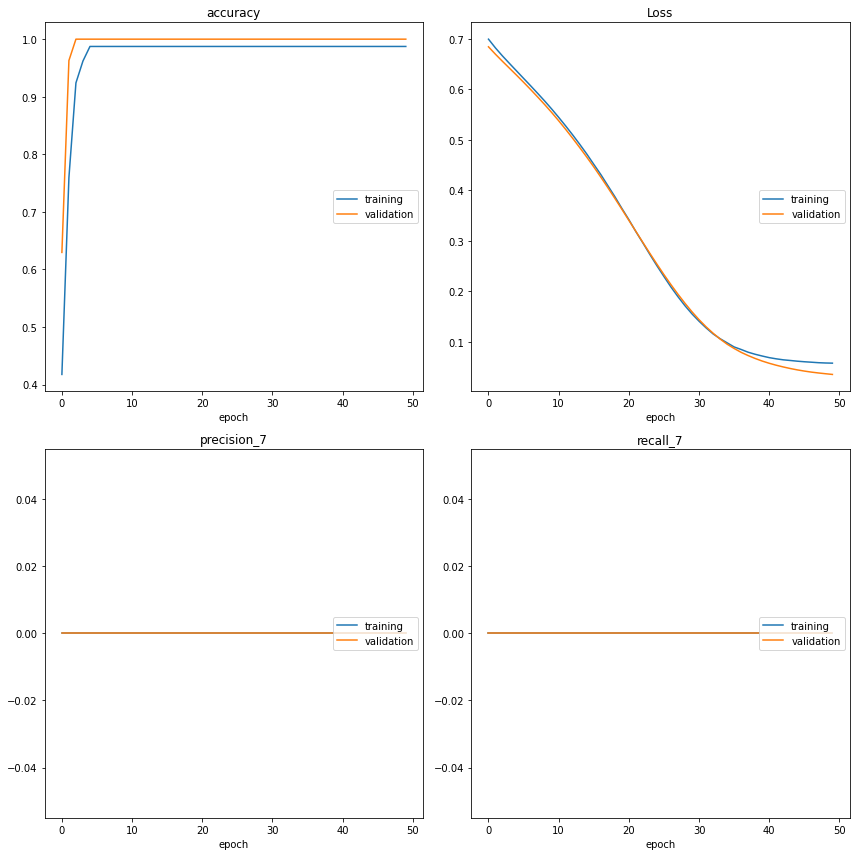

accuracy
	training         	 (min:    0.418, max:    0.987, cur:    0.987)
	validation       	 (min:    0.630, max:    1.000, cur:    1.000)
Loss
	training         	 (min:    0.058, max:    0.699, cur:    0.058)
	validation       	 (min:    0.035, max:    0.684, cur:    0.035)
precision_7
	training         	 (min:    0.000, max:    0.000, cur:    0.000)
	validation       	 (min:    0.000, max:    0.000, cur:    0.000)
recall_7
	training         	 (min:    0.000, max:    0.000, cur:    0.000)
	validation       	 (min:    0.000, max:    0.000, cur:    0.000)
3/3 [==============================] - 1s 256ms/step - loss: 0.0577 - accuracy: 0.9873 - precision_7: 0.0000e+00 - recall_7: 0.0000e+00 - val_loss: 0.0354 - val_accuracy: 1.0000 - val_precision_7: 0.0000e+00 - val_recall_7: 0.0000e+00


In [229]:
model.fit(X_train,y_train,epochs=50,batch_size=32,validation_data=(X_test,y_test),callbacks=[PlotLossesKerasTF()])